
Data Merge

Two datasets customer_social_profilesLinks and customer_transactionsLinks. The goal is to create a predictive model using a dataset that is created as a result of merging the two sources. The model predicts the product a customer would purchase when visiting your social media sites. Tasked is to ensure that I capture the relevant features from both datasets.



In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load and Inspecting the Data

In [541]:
social = pd.read_csv("/home/belysetag/Documents/Formative-2-Data-Preprocessing/data/tabular_data/customer_social_profiles - customer_social_profiles.csv")
print("Social Profiles Shape:", social.shape)
social.info()
social.head()


Social Profiles Shape: (155, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,178,LinkedIn,74,4.9,Positive
1,190,Twitter,82,4.8,Neutral
2,150,Facebook,96,1.6,Positive
3,162,Twitter,89,2.6,Positive
4,197,Twitter,92,2.3,Neutral


In [542]:
trans = pd.read_csv("/home/belysetag/Documents/Formative-2-Data-Preprocessing/data/tabular_data/customer_transactions - customer_transactions.csv")
print("Transactions Shape:", trans.shape)
trans.info()
trans.head()

Transactions Shape: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


Check and handle missing values and duplicates

In [543]:
#checking for missing values
print("Missing Values - Social")
print(social.isnull().sum())
print("\nMissing Values - Transactions")
print(trans.isnull().sum())


Missing Values - Social
customer_id_new            0
social_media_platform      0
engagement_score           0
purchase_interest_score    0
review_sentiment           0
dtype: int64

Missing Values - Transactions
customer_id_legacy     0
transaction_id         0
purchase_amount        0
purchase_date          0
product_category       0
customer_rating       10
dtype: int64


In [544]:
#check for duplicates
print("Duplicates - Social:", social.duplicated().sum())
print("Duplicates - Transactions:", trans.duplicated().sum())

Duplicates - Social: 5
Duplicates - Transactions: 0


In [545]:
#handle customer_rating missing values and use median to fill
trans['customer_rating'] = trans['customer_rating'].fillna(trans['customer_rating'].median())
print(trans.isnull().sum())


customer_id_legacy    0
transaction_id        0
purchase_amount       0
purchase_date         0
product_category      0
customer_rating       0
dtype: int64


In [546]:
#inspect duplicates
is_dup_any = social.duplicated(keep=False)
duplicates = social[is_dup_any]
print(duplicates)


     customer_id_new social_media_platform  engagement_score  \
18               116               Twitter                78   
73               125              LinkedIn                66   
76               155                TikTok                98   
78               162               Twitter                71   
118              189               Twitter                59   
150              125              LinkedIn                66   
151              116               Twitter                78   
152              189               Twitter                59   
153              162               Twitter                71   
154              155                TikTok                98   

     purchase_interest_score review_sentiment  
18                       1.1         Negative  
73                       4.7         Positive  
76                       4.8         Positive  
78                       4.8         Positive  
118                      3.8          Neutral  
150    

In [547]:
#handle duplicates
social = social.drop_duplicates(keep='first')
print("Duplicates after removal - Social:", social.duplicated().sum())

Duplicates after removal - Social: 0


Datatype fix

In [548]:
trans['purchase_date'] = pd.to_datetime(trans['purchase_date'])


In [549]:
#inspecting social and trans after removing duplicates,missing values and data type conversion
social.info()
trans.info()

print("Social DataFrame - Missing Values:", social.isnull().sum().sum())
print("Social DataFrame - Duplicates:", social.duplicated().sum())
print("Transactions DataFrame - Missing Values:", trans.isnull().sum().sum())
print("Transactions DataFrame - Duplicates:", trans.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          150 non-null    int64  
 1   social_media_platform    150 non-null    object 
 2   engagement_score         150 non-null    int64  
 3   purchase_interest_score  150 non-null    float64
 4   review_sentiment         150 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id_legacy  150 non-null    int64         
 1   transaction_id      150 non-null    int64         
 2   purchase_amount     150 non-null    int64         
 3   purchase_date       150 non-null    datetime64[ns]
 4   product_category

In [550]:

social = social.rename(columns={'customer_id_new': 'customer_id'})
trans = trans.rename(columns={'customer_id_legacy': 'customer_id'})


In [551]:
#ispecting data after remaning id columns

social.info(),
trans.info()

print("Social DataFrame - Missing Values:", social.isnull().sum().sum())
print("Social DataFrame - Duplicates:", social.duplicated().sum())
print("Transactions DataFrame - Missing Values:", trans.isnull().sum().sum())
print("Transactions DataFrame - Duplicates:", trans.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              150 non-null    int64  
 1   social_media_platform    150 non-null    object 
 2   engagement_score         150 non-null    int64  
 3   purchase_interest_score  150 non-null    float64
 4   review_sentiment         150 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       150 non-null    int64         
 1   transaction_id    150 non-null    int64         
 2   purchase_amount   150 non-null    int64         
 3   purchase_date     150 non-null    datetime64[ns]
 4   product_category  150 non-nu

In [552]:
social.head()

,customer_id,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,178,LinkedIn,74,4.9,Positive
1,190,Twitter,82,4.8,Neutral
2,150,Facebook,96,1.6,Positive
3,162,Twitter,89,2.6,Positive
4,197,Twitter,92,2.3,Neutral


In [553]:
trans.head()

,customer_id,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


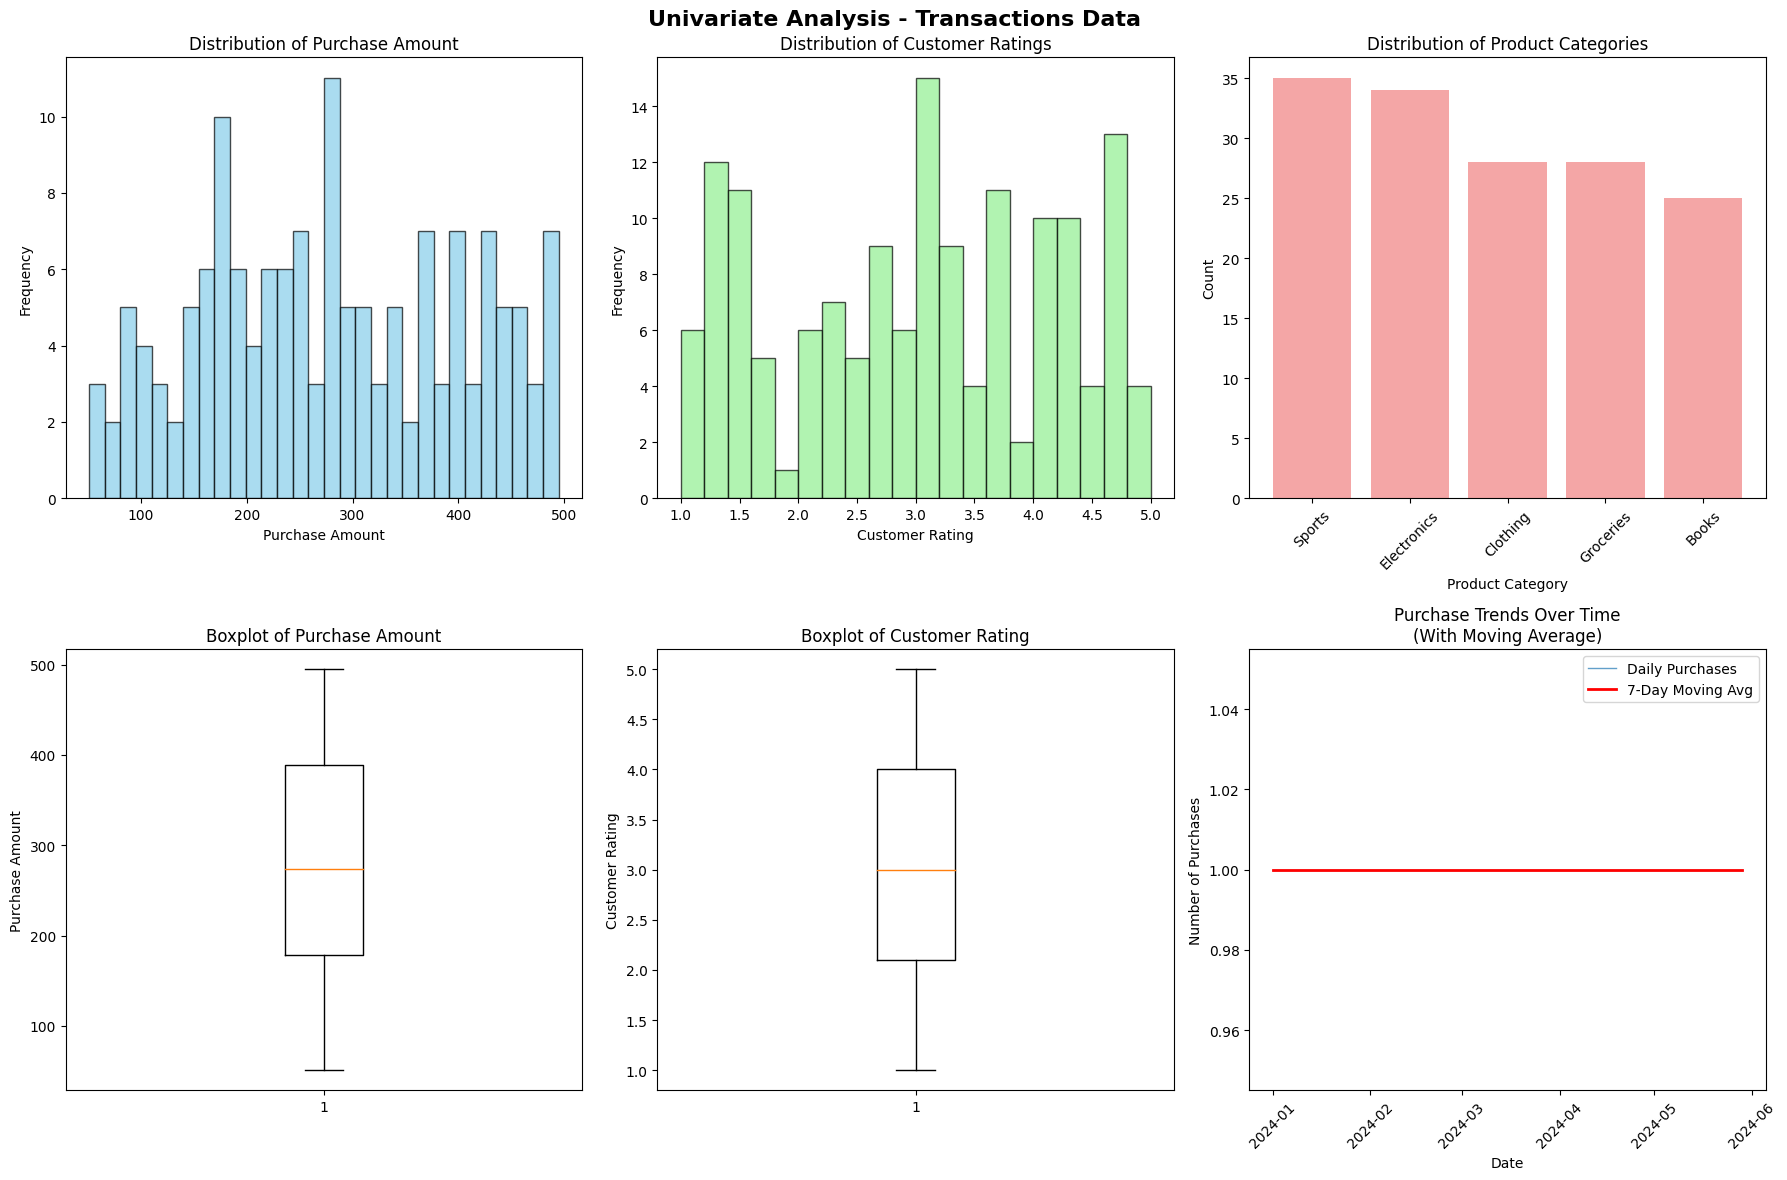

=== TRANSACTIONS SUMMARY STATISTICS ===
       purchase_amount  customer_rating
count       150.000000       150.000000
mean        280.780000         2.986000
std         121.329595         1.165789
min          51.000000         1.000000
25%         179.000000         2.100000
50%         274.000000         3.000000
75%         388.500000         4.000000
max         495.000000         5.000000

=== TIME SERIES ANALYSIS ===
Date range: 2024-01-01 00:00:00 to 2024-05-29 00:00:00
Total days in range: 149 days
Days with purchases: 150
Days without purchases: 0
Purchase frequency: 150.00 purchases per day


In [554]:
# Create subplots for univariate analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis - Transactions Data', fontsize=16, fontweight='bold')

# Purchase Amount Distribution
axes[0,0].hist(trans['purchase_amount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Purchase Amount')
axes[0,0].set_xlabel('Purchase Amount')
axes[0,0].set_ylabel('Frequency')

# Customer Rating Distribution
axes[0,1].hist(trans['customer_rating'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribution of Customer Ratings')
axes[0,1].set_xlabel('Customer Rating')
axes[0,1].set_ylabel('Frequency')

# Product Category Distribution
product_counts = trans['product_category'].value_counts()
axes[0,2].bar(product_counts.index, product_counts.values, color='lightcoral', alpha=0.7)
axes[0,2].set_title('Distribution of Product Categories')
axes[0,2].set_xlabel('Product Category')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=45)

# Boxplot for Purchase Amount
axes[1,0].boxplot(trans['purchase_amount'])
axes[1,0].set_title('Boxplot of Purchase Amount')
axes[1,0].set_ylabel('Purchase Amount')

# Boxplot for Customer Rating
axes[1,1].boxplot(trans['customer_rating'])
axes[1,1].set_title('Boxplot of Customer Rating')
axes[1,1].set_ylabel('Customer Rating')

# CORRECTED: Purchase Date Analysis with Interpolation
trans['purchase_date'] = pd.to_datetime(trans['purchase_date'])

# Create daily purchase counts
daily_purchases = trans.groupby('purchase_date').size()

# Create complete date range to identify gaps
date_range = pd.date_range(
    start=trans['purchase_date'].min(),
    end=trans['purchase_date'].max(),
    freq='D'
)

# Reindex to include all dates and fill missing days with 0
daily_purchases_complete = daily_purchases.reindex(date_range, fill_value=0)

# For time series visualization, we can use interpolation to show trends
# First create a series with proper frequency
daily_series = daily_purchases_complete.asfreq('D')



# Plot actual daily purchases
axes[1,2].plot(daily_series.index, daily_series.values, alpha=0.7, label='Daily Purchases', linewidth=1)
# Add 7-day rolling average to show trend
rolling_avg = daily_series.rolling(window=7, min_periods=1).mean()
axes[1,2].plot(rolling_avg.index, rolling_avg.values, label='7-Day Moving Avg', linewidth=2, color='red')
axes[1,2].set_title('Purchase Trends Over Time\n(With Moving Average)')
axes[1,2].set_xlabel('Date')
axes[1,2].set_ylabel('Number of Purchases')
axes[1,2].legend()
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary Statistics
print("=== TRANSACTIONS SUMMARY STATISTICS ===")
print(trans[['purchase_amount', 'customer_rating']].describe())

# Additional Time Series Analysis
print("\n=== TIME SERIES ANALYSIS ===")
print(f"Date range: {trans['purchase_date'].min()} to {trans['purchase_date'].max()}")
print(f"Total days in range: {(trans['purchase_date'].max() - trans['purchase_date'].min()).days} days")
print(f"Days with purchases: {daily_purchases.shape[0]}")
print(f"Days without purchases: {len(date_range) - daily_purchases.shape[0]}")
print(f"Purchase frequency: {len(trans):.2f} purchases per day")

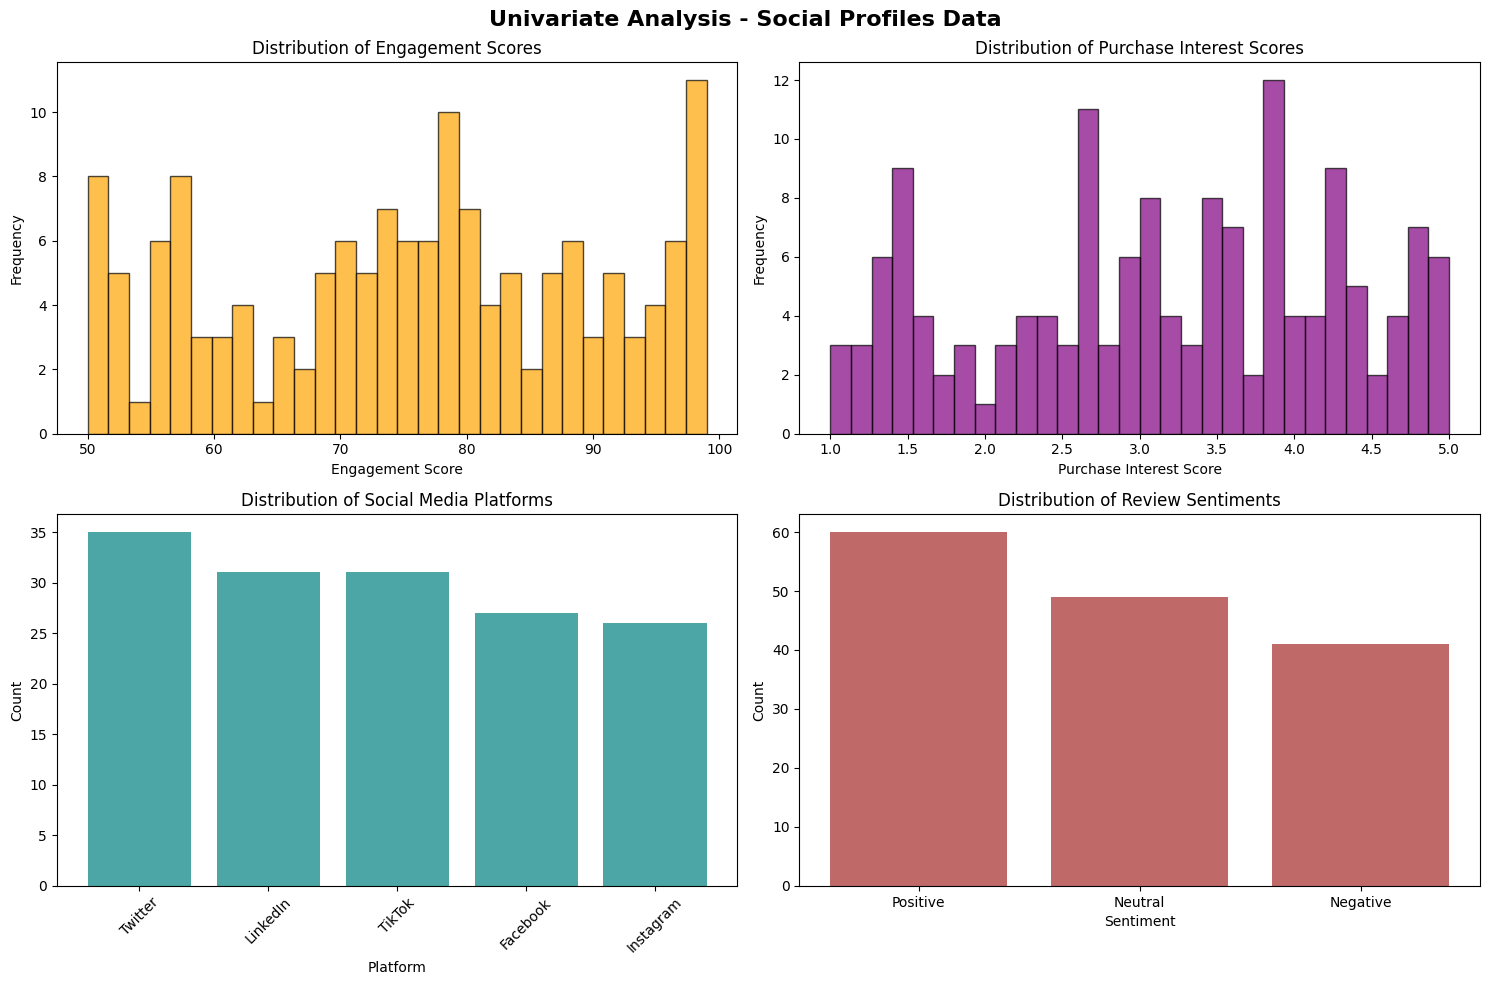

=== SOCIAL PROFILES SUMMARY STATISTICS ===
       engagement_score  purchase_interest_score
count        150.000000                150.00000
mean          75.646667                  3.13000
std           14.605844                  1.12511
min           50.000000                  1.00000
25%           63.250000                  2.32500
50%           77.000000                  3.20000
75%           87.750000                  4.00000
max           99.000000                  5.00000


In [555]:
# Social Profiles Univariate Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis - Social Profiles Data', fontsize=16, fontweight='bold')

# Engagement Score Distribution
axes[0,0].hist(social['engagement_score'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0,0].set_title('Distribution of Engagement Scores')
axes[0,0].set_xlabel('Engagement Score')
axes[0,0].set_ylabel('Frequency')

# Purchase Interest Score Distribution
axes[0,1].hist(social['purchase_interest_score'], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[0,1].set_title('Distribution of Purchase Interest Scores')
axes[0,1].set_xlabel('Purchase Interest Score')
axes[0,1].set_ylabel('Frequency')

# Social Media Platform Distribution
platform_counts = social['social_media_platform'].value_counts()
axes[1,0].bar(platform_counts.index, platform_counts.values, color='teal', alpha=0.7)
axes[1,0].set_title('Distribution of Social Media Platforms')
axes[1,0].set_xlabel('Platform')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Review Sentiment Distribution
sentiment_counts = social['review_sentiment'].value_counts()
axes[1,1].bar(sentiment_counts.index, sentiment_counts.values, color='brown', alpha=0.7)
axes[1,1].set_title('Distribution of Review Sentiments')
axes[1,1].set_xlabel('Sentiment')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("=== SOCIAL PROFILES SUMMARY STATISTICS ===")
print(social[['engagement_score', 'purchase_interest_score']].describe())

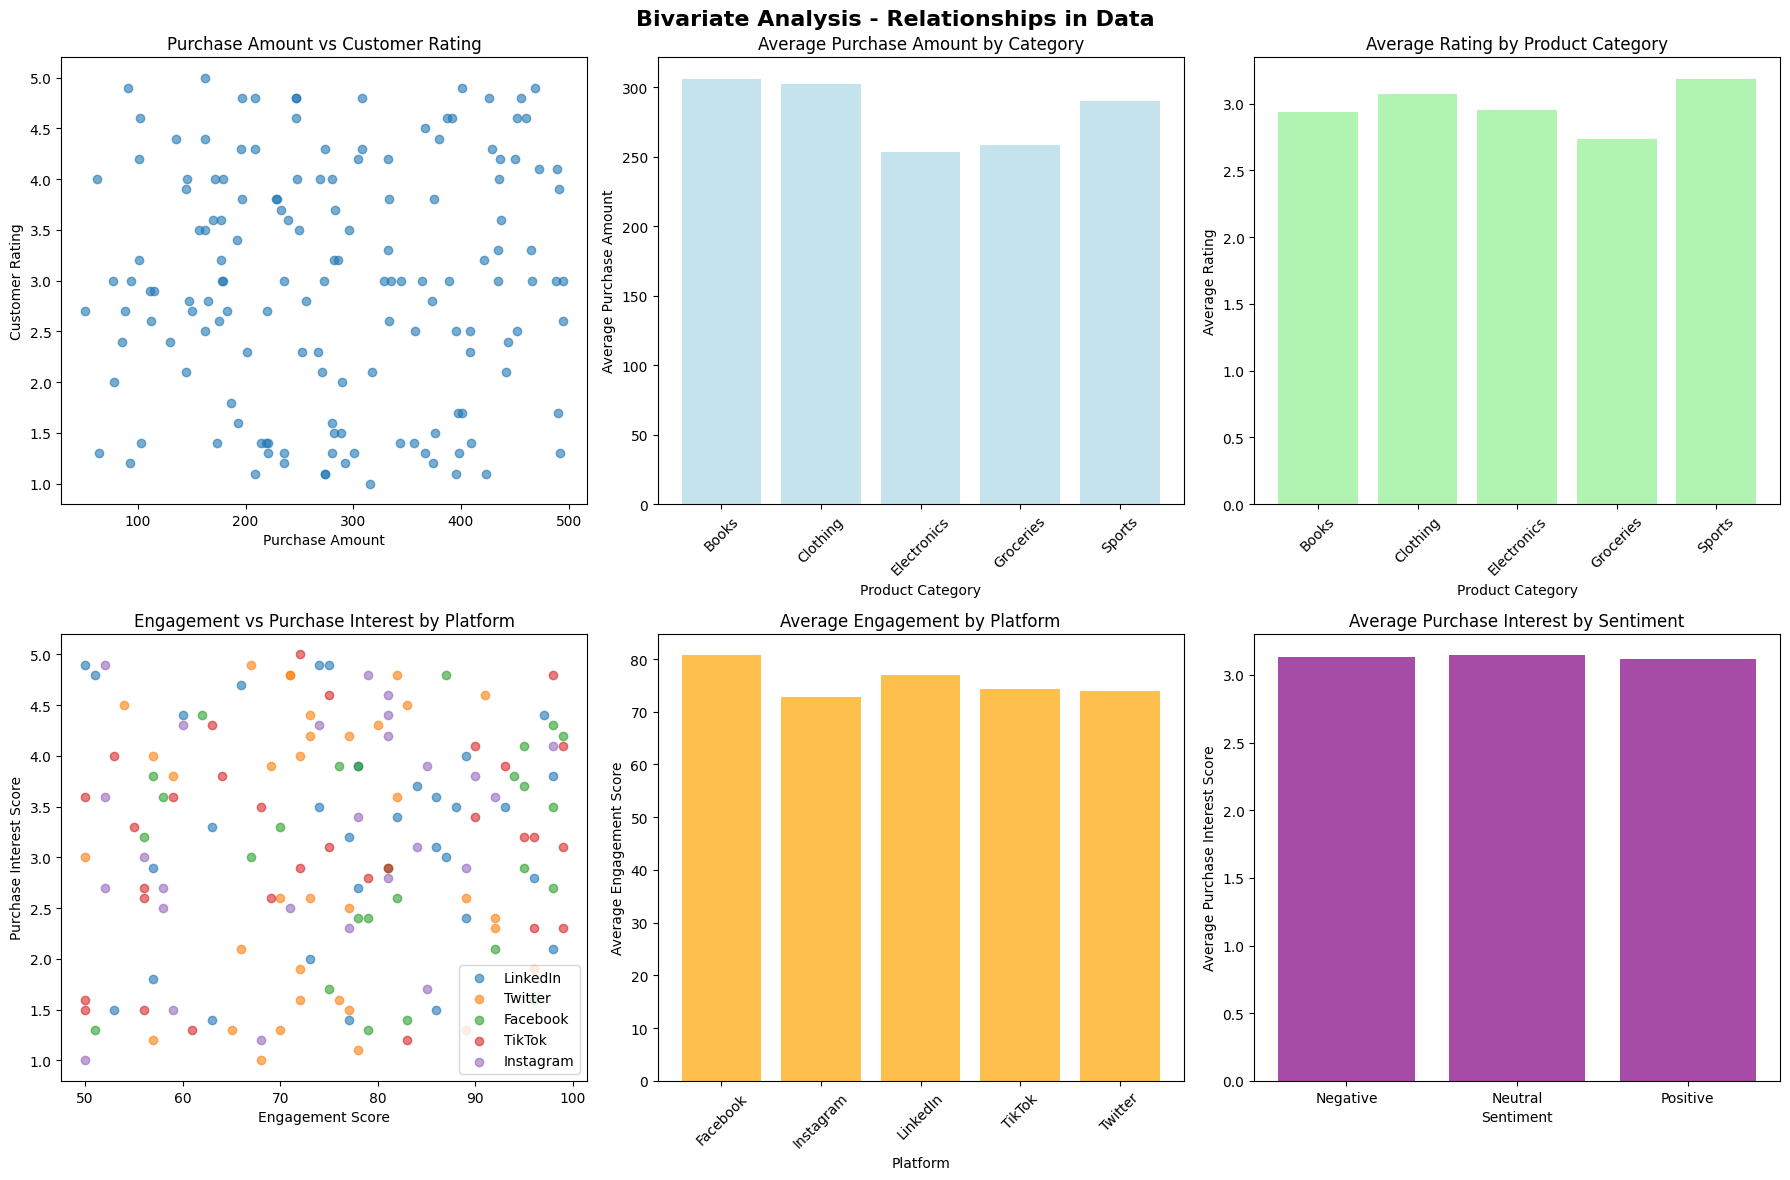

In [556]:
#Visualizing Relationships - Bivariate & Multivariate Analysis
# Bivariate Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bivariate Analysis - Relationships in Data', fontsize=16, fontweight='bold')

# Purchase Amount vs Customer Rating
axes[0,0].scatter(trans['purchase_amount'], trans['customer_rating'], alpha=0.6)
axes[0,0].set_title('Purchase Amount vs Customer Rating')
axes[0,0].set_xlabel('Purchase Amount')
axes[0,0].set_ylabel('Customer Rating')

# Average purchase amount by product category
category_avg = trans.groupby('product_category')['purchase_amount'].mean()
axes[0,1].bar(category_avg.index, category_avg.values, color='lightblue', alpha=0.7)
axes[0,1].set_title('Average Purchase Amount by Category')
axes[0,1].set_xlabel('Product Category')
axes[0,1].set_ylabel('Average Purchase Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Average rating by product category
rating_avg = trans.groupby('product_category')['customer_rating'].mean()
axes[0,2].bar(rating_avg.index, rating_avg.values, color='lightgreen', alpha=0.7)
axes[0,2].set_title('Average Rating by Product Category')
axes[0,2].set_xlabel('Product Category')
axes[0,2].set_ylabel('Average Rating')
axes[0,2].tick_params(axis='x', rotation=45)

# Social profiles: Engagement vs Purchase Interest by Platform
for platform in social['social_media_platform'].unique():
    platform_data = social[social['social_media_platform'] == platform]
    axes[1,0].scatter(platform_data['engagement_score'], platform_data['purchase_interest_score'], 
                     alpha=0.6, label=platform)
axes[1,0].set_title('Engagement vs Purchase Interest by Platform')
axes[1,0].set_xlabel('Engagement Score')
axes[1,0].set_ylabel('Purchase Interest Score')
axes[1,0].legend()

# Average engagement by platform
platform_engagement = social.groupby('social_media_platform')['engagement_score'].mean()
axes[1,1].bar(platform_engagement.index, platform_engagement.values, color='orange', alpha=0.7)
axes[1,1].set_title('Average Engagement by Platform')
axes[1,1].set_xlabel('Platform')
axes[1,1].set_ylabel('Average Engagement Score')
axes[1,1].tick_params(axis='x', rotation=45)

# Average purchase interest by sentiment
sentiment_interest = social.groupby('review_sentiment')['purchase_interest_score'].mean()
axes[1,2].bar(sentiment_interest.index, sentiment_interest.values, color='purple', alpha=0.7)
axes[1,2].set_title('Average Purchase Interest by Sentiment')
axes[1,2].set_xlabel('Sentiment')
axes[1,2].set_ylabel('Average Purchase Interest Score')

plt.tight_layout()
plt.show()


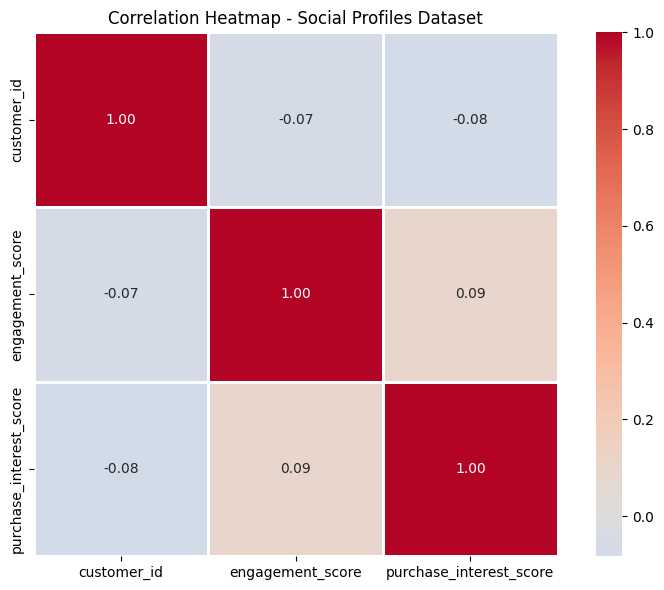

In [557]:
# For Social Profiles Dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
social_numeric = social.select_dtypes(include=[np.number])
corr_social = social_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_social, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap - Social Profiles Dataset')
plt.tight_layout()
plt.show()

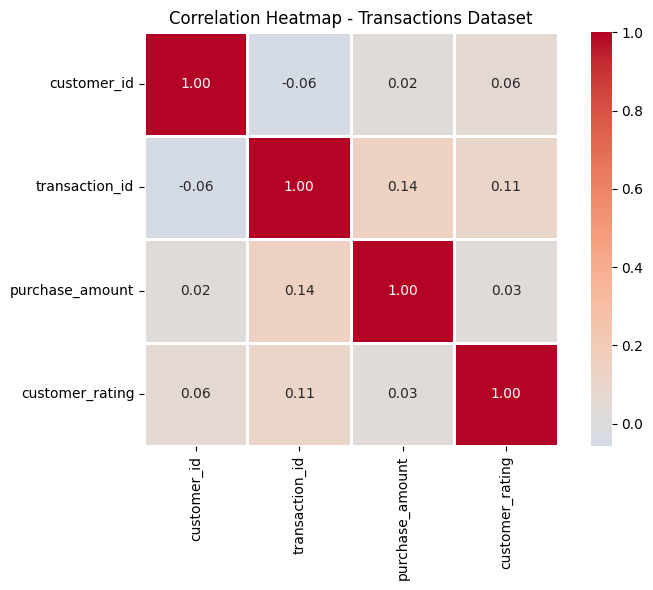

In [558]:
# For Transactions Dataset
trans_numeric = trans.select_dtypes(include=[np.number])
corr_trans = trans_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_trans, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap - Transactions Dataset')
plt.tight_layout()
plt.show()

DATA MERGE

In [559]:
#mergering dataframes
merged_df = pd.merge(trans, social, on='customer_id', how='inner')
print("Merged DataFrame Shape:", merged_df.shape)
merged_df.head()
#save merged dataframe in /home/belysetag/Documents/Formative-2-Data-Preprocessing/data_processed/tabular
merged_df.to_csv("/home/belysetag/Documents/Formative-2-Data-Preprocessing/data_processed/tabular/merged_customer_data.csv", index=False)

Merged DataFrame Shape: (213, 10)


In [565]:
#chech post merge info
merged_df.info()
print("Merged DataFrame - Missing Values:", merged_df.isnull().sum().sum())
print("Merged DataFrame - Duplicates:", merged_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              213 non-null    int64         
 1   transaction_id           213 non-null    int64         
 2   purchase_amount          213 non-null    int64         
 3   purchase_date            213 non-null    datetime64[ns]
 4   product_category         213 non-null    object        
 5   customer_rating          213 non-null    float64       
 6   social_media_platform    213 non-null    object        
 7   engagement_score         213 non-null    int64         
 8   purchase_interest_score  213 non-null    float64       
 9   review_sentiment         213 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 16.8+ KB
Merged DataFrame - Missing Values: 0
Merged DataFrame - Duplicates: 0


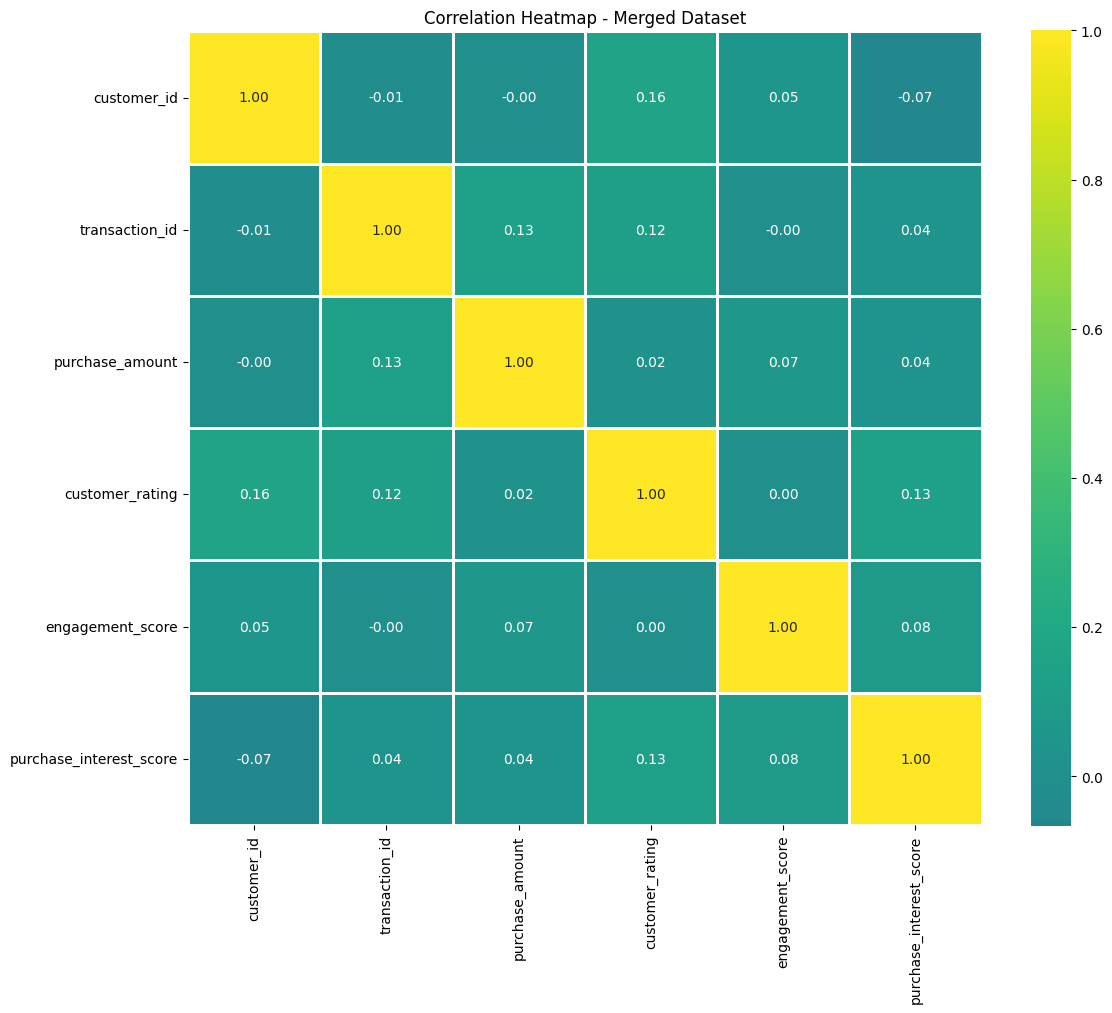

In [566]:
correlation_matrix = merged_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap - Merged Dataset')
plt.tight_layout()
plt.show()

In [ ]:
#co